In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

In [3]:
df = pd.io.stata.read_stata('ZA7572_v1-0-0-91.3 .dta')
len(df)

27655

In [4]:
df.head()

,studyno1,studyno2,doi,version,edition,survey,caseid,uniqid,serialid,tnscntry,...,w87,w89,w90,w98,w83,w84,w99,w85,w86,wex
0,GESIS STUDY ID ZA7572,GESIS STUDY ID ZA7572,doi:10.4232/1.13372,1.0.0 (2019-09-30),Archive pre-release,Eurobarometer 91.3 (April 2019),17,10000017,1,belgique,...,0.683368,0.563050,0.0,0.593944,0.0,0.0,0.0,0.622649,0.0,9730.496094
1,GESIS STUDY ID ZA7572,GESIS STUDY ID ZA7572,doi:10.4232/1.13372,1.0.0 (2019-09-30),Archive pre-release,Eurobarometer 91.3 (April 2019),18,10000018,2,belgique,...,0.505133,0.416196,0.0,0.439032,0.0,0.0,0.0,0.460250,0.0,7192.597168
2,GESIS STUDY ID ZA7572,GESIS STUDY ID ZA7572,doi:10.4232/1.13372,1.0.0 (2019-09-30),Archive pre-release,Eurobarometer 91.3 (April 2019),19,10000019,3,belgique,...,0.523790,0.431568,0.0,0.455248,0.0,0.0,0.0,0.477250,0.0,7458.256836
3,GESIS STUDY ID ZA7572,GESIS STUDY ID ZA7572,doi:10.4232/1.13372,1.0.0 (2019-09-30),Archive pre-release,Eurobarometer 91.3 (April 2019),20,10000020,4,belgique,...,0.584988,0.481991,0.0,0.508438,0.0,0.0,0.0,0.533010,0.0,8329.658203
4,GESIS STUDY ID ZA7572,GESIS STUDY ID ZA7572,doi:10.4232/1.13372,1.0.0 (2019-09-30),Archive pre-release,Eurobarometer 91.3 (April 2019),21,10000021,5,belgique,...,0.505133,0.416196,0.0,0.439032,0.0,0.0,0.0,0.460250,0.0,7192.597168


In [5]:
df.groupby('qb2')['qb2'].count()

qb2
1. Not at all a serious problem      373
2                                    219
3                                    492
4                                    597
5                                   2274
6                                   2154
7                                   3980
8                                   5409
9                                   3571
10. An extremely serious problem    8229
dk                                   357
Name: qb2, dtype: int64

In [6]:
df.groupby('country',sort=True)['country'].count()


country
FR - France                1029
BE - Belgium               1029
NL - The Netherlands       1022
DE-W - Germany - West      1037
IT - Italy                 1022
LU - Luxembourg             502
DK - Denmark               1019
IE - Ireland               1067
GB-UKM - United Kingdom    1052
GR - Greece                1014
ES -Spain                  1011
PT - Portugal              1012
DE-E Germany East           502
FI - Finland               1006
SE - Sweden                1034
AT - Austria               1039
CY - Cyprus (Republic)      504
CZ - Czech Republic        1019
EE - Estonia                999
HU - Hungary               1023
LV - Latvia                1003
LT - Lithuania             1001
MT - Malta                  507
PL - Poland                1013
SK - Slovakia              1076
SI - Slovenia              1003
BG - Bulgaria              1041
RO - Romania               1053
HR - Croatia               1016
Name: country, dtype: int64

In [7]:
df.groupby('d10',sort=True)['d10'].count()


d10
Man      12634
Woman    15021
Name: d10, dtype: int64

In [15]:
df =  df.replace({'Box 1 - left' : 1, 'Box 2': 2, 'Box 3': 3, 'Box 4': 4, 'Box 5': 5, 'Box 6' : 6, 'Box 7': 7, 'Box 8': 8, 'Box 9': 9, 'Box 10 - right': 10 , '1. Not at all a serious problem': 1,'10. An extremely serious problem':10 })
df = df.replace({'15 years' : 15, '98 years': 98,'2 years': 2, '87 years': 87,'No full-time education':99, 'Still studying':0})
df = df.replace({'Unemployed, temporarily not working':'non-active', 'Retired, unable to work':'non-active','Student':'non-active','Farmer':'self employed', 'Fisherman': 'self employed','Skilled manual worker': 'employed', 'Unskilled manual worker, etc.':'employed','Responsible for ordinary shopping, etc.': 'non-active', 'Employed professional (employed doctor, etc.)':'employed', 'Employed position, at desk': 'employed','Employed position, travelling': 'employed', 'Employed position, service job':'employed','Supervisor':'employed','Professional (lawyer, etc.)': 'self employed', 'Owner of a shop, craftsmen, etc.':'self employed', 'Business proprietors, etc.': 'self employed','General management, etc.': 'employed', 'Middle management, etc.':'employed'})
df = df.replace({'(Re-)Married: without children':'con patner', '(Re-)Married: children this marriage':'con patner e figli','(Re-)Married: children prev marriage':'con patner e figli','(Re-)Married: children this/prev marriage':'con patner e figli', 'Single liv w partner: without children': 'con patner','Single liv w partner: childr this union': 'con patner e figli', 'Single liv w partner: childr prev union':'con patner e figli','Single liv w partner: childr this/prev union': 'con patner e figli', 'Single: without children':'single', 'Single: with children': 'single con figli','Divorced/Separated: without children': 'single', 'Divorced/Separated: with children':'single con figli','Widow: without children':'single','Widow: with children': 'single con figli'})


In [16]:
#opzione si dichiara orientamento politico o no 
#df['d1'] = df['d1'].replace({1:'posizionabile', 2:'posizionabile',3:'posizionabile',4: 'posizionabile', 5: 'posizionabile',6: 'posizionabile', 7: 'posizionabile', 8: 'posizionabile', 9: 'posizionabile', 10: 'posizionabile', 'Refusal': 'non-posizionabile', 'dk': 'non-posizionabile'})
#c = df.groupby('d1').count()


#opzione categorica (2 a 2)
df['d1'] = df['d1'].replace({1:'sx', 2:'sx',3:'centro-sx',4: 'centro-sx', 5: 'centro',6: 'centro', 7: 'centro-dx', 8: 'centro-dx', 9: 'dx', 10: 'dx', 'Refusal': 'non-posizionabile', 'dk': 'non-posizionabile'})
c = df.groupby('d1').count()


#opzione numerica continua
#df['d1'] = df['d1'].replace({ 'Refusal': 11, 'dk': 11})
#c = df.groupby('d1').count()
c

,studyno1,studyno2,doi,version,edition,survey,caseid,uniqid,serialid,tnscntry,...,w87,w89,w90,w98,w83,w84,w99,w85,w86,wex
d1,,,,,,,,,,,,,,,,,,,,,
centro,9758,9758,9758,9758,9758,9758,9758,9758,9758,9758,...,9758,9758,9758,9758,9758,9758,9758,9758,9758,9758
centro-dx,4099,4099,4099,4099,4099,4099,4099,4099,4099,4099,...,4099,4099,4099,4099,4099,4099,4099,4099,4099,4099
centro-sx,4596,4596,4596,4596,4596,4596,4596,4596,4596,4596,...,4596,4596,4596,4596,4596,4596,4596,4596,4596,4596
dx,1942,1942,1942,1942,1942,1942,1942,1942,1942,1942,...,1942,1942,1942,1942,1942,1942,1942,1942,1942,1942
non-posizionabile,5025,5025,5025,5025,5025,5025,5025,5025,5025,5025,...,5025,5025,5025,5025,5025,5025,5025,5025,5025,5025
sx,2235,2235,2235,2235,2235,2235,2235,2235,2235,2235,...,2235,2235,2235,2235,2235,2235,2235,2235,2235,2235


In [17]:
df = df[['qb1a','qb2', 'qb5', 'qb4_3','qb4_5','qb7','qb8','qb9', 'd1', 'd10','d11', 'country','d25','d8', 'd63','d7']]

print(len(df))

27655


In [18]:
df.isnull().sum().sum()

0

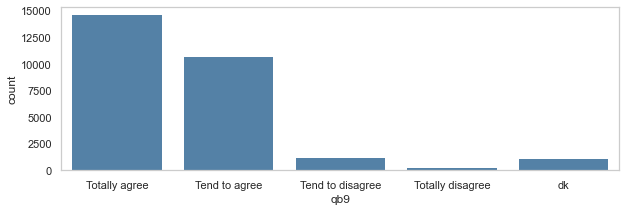

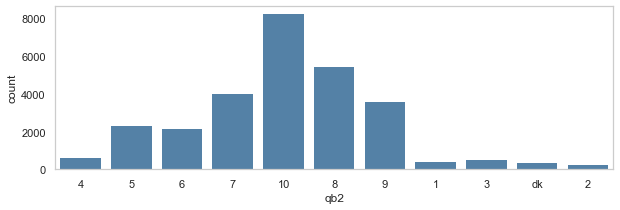

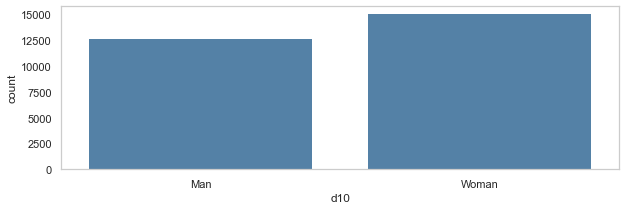

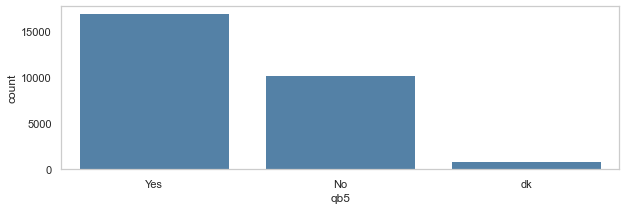

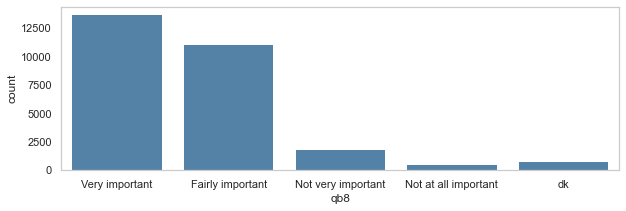

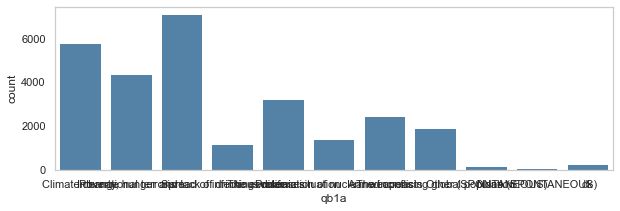

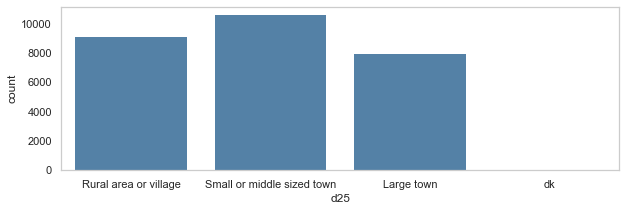

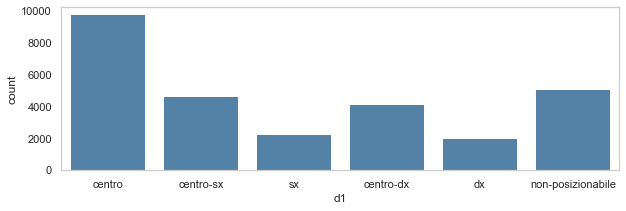

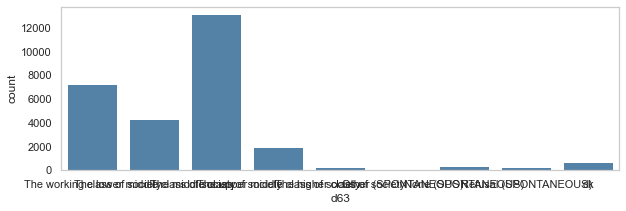

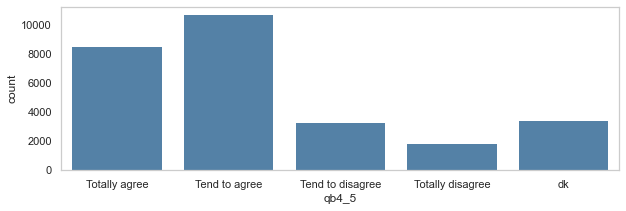

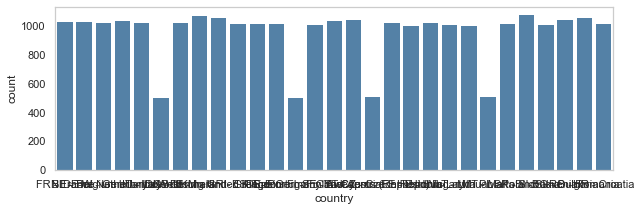

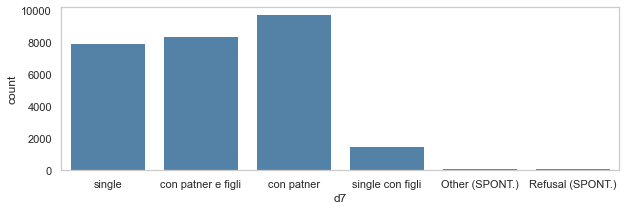

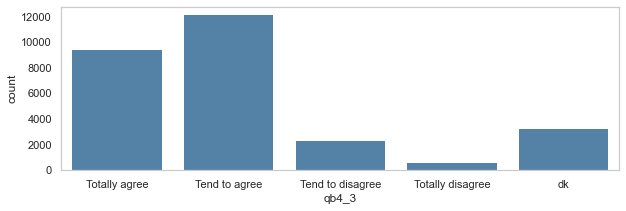

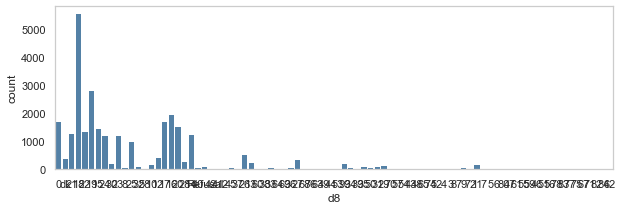

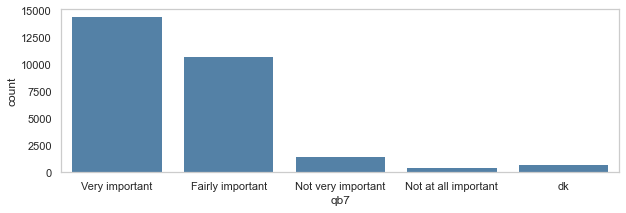

In [19]:
###breve data exploration delle variabili 
import seaborn as sns

#Creating a function to plot Count plot
def count_plot(df,feature):
    sns.set(color_codes = 'Blue', style="whitegrid")
    sns.set_style("whitegrid", {'axes.grid' : False})
    sns.set_context(rc = {'patch.linewidth': 0.0})
    fig = plt.subplots(figsize=(10,3))
    sns.countplot(x=feature, data=df, color = 'steelblue') # countplot
    plt.show()

# Filter categorical variables
num_cols = df._get_numeric_data().columns
cols = df.columns
cat_cols = list(set(cols) - set(num_cols))
for col in cat_cols:
    #if col in ['DayOfWeek','UniqueCarrier','Month', 'Cancelled','DayofMonth','CancellationCode','Diverted']:
        count_plot(df,col)

In [20]:
search2 = 'dk' 
print (df.qb2.str.count(search2).sum()) #357
print (df.qb5.str.count(search2).sum()) #780
print (df.qb7.str.count(search2).sum()) #697
print (df.qb8.str.count(search2).sum()) #696
print (df.qb9.str.count(search2).sum()) #1073
#print (df.d1.str.count(search2).sum()) 
#print (df.d10.str.count(search2).sum())
#print (df.d11.str.count(search2).sum())
print (df.country.str.count(search2).sum()) #0
print (df.d25.str.count(search2).sum()) #11
print (df.d8.str.count(search2).sum()) #350
print (df.d63.str.count(search2).sum()) #580
print (df.d7.str.count(search2).sum()) #0

357.0
780
697
696
1073
0
11
350.0
580
0


In [21]:
search2 = 'Refusal' 
print (df.qb2.str.count(search2).sum()) #0
print (df.qb5.str.count(search2).sum()) #0
print (df.qb7.str.count(search2).sum()) #0
print (df.qb8.str.count(search2).sum()) #0
print (df.qb9.str.count(search2).sum()) #0
#print (df.d1.str.count(search2).sum()) 
#print (df.d10.str.count(search2).sum())
#print (df.d11.str.count(search2).sum())
print (df.country.str.count(search2).sum()) #0
print (df.d25.str.count(search2).sum()) #0
print (df.d8.str.count(search2).sum()) #90
print (df.d63.str.count(search2).sum()) #171
print (df.d7.str.count(search2).sum()) #50

0.0
0
0
0
0
0
0
90.0
171
50


In [22]:
search2 = 'Other'

print (df.qb2.str.count(search2).sum()) #0
print (df.qb5.str.count(search2).sum()) #0
print (df.qb7.str.count(search2).sum()) #0
print (df.qb8.str.count(search2).sum()) #0
print (df.qb9.str.count(search2).sum()) #0
#print (df.d1.str.count(search2).sum()) 
#print (df.d10.str.count(search2).sum())
#print (df.d11.str.count(search2).sum())
print (df.country.str.count(search2).sum()) #0
print (df.d25.str.count(search2).sum()) #0
print (df.d8.str.count(search2).sum()) #0
print (df.d63.str.count(search2).sum()) #56
print (df.d7.str.count(search2).sum()) #77


0.0
0
0
0
0
0
0
0.0
56
77


In [23]:
df.qb5 = df.qb5.replace(['dk'], np.NaN)
df.qb5 = df.qb5.replace(['Refusal'], np.NaN)
df.qb5  = df.qb5.replace(['Refusal (SPONTANEOUS)'], np.NaN)
df.qb5  = df.qb5.replace(['Refusal (SPONT.)'], np.NaN)

df.qb2 = df.qb2.replace(['dk'], np.NaN)
df.qb2 = df.qb2.replace(['Refusal'], np.NaN)
df.qb2  = df.qb2.replace(['Refusal (SPONTANEOUS)'], np.NaN)
df.qb2  = df.qb2.replace(['Refusal (SPONT.)'], np.NaN)

df.qb4_3 = df.qb4_3.replace(['dk'], np.NaN)
df.qb4_3 = df.qb4_3.replace(['Refusal'], np.NaN)
df.qb4_3  = df.qb4_3.replace(['Refusal (SPONTANEOUS)'], np.NaN)
df.qb4_3  = df.qb4_3.replace(['Refusal (SPONT.)'], np.NaN)

df.qb4_5 = df.qb4_5.replace(['dk'], np.NaN)
df.qb4_5 = df.qb4_5.replace(['Refusal'], np.NaN)
df.qb4_5  = df.qb4_5.replace(['Refusal (SPONTANEOUS)'], np.NaN)
df.qb4_5  = df.qb4_5.replace(['Refusal (SPONT.)'], np.NaN)

df.qb7 = df.qb7.replace(['dk'], np.NaN)
df.qb7 = df.qb7.replace(['Refusal'], np.NaN)
df.qb7  = df.qb7.replace(['Refusal (SPONTANEOUS)'], np.NaN)
df.qb7  = df.qb7.replace(['Refusal (SPONT.)'], np.NaN)

df.qb8 = df.qb8.replace(['dk'], np.NaN)
df.qb8 = df.qb8.replace(['Refusal'], np.NaN)
df.qb8  = df.qb8.replace(['Refusal (SPONTANEOUS)'], np.NaN)
df.qb8  = df.qb8.replace(['Refusal (SPONT.)'], np.NaN)

df.qb9 = df.qb9.replace(['dk'], np.NaN)
df.qb9 = df.qb9.replace(['Refusal'], np.NaN)
df.qb9  = df.qb9.replace(['Refusal (SPONTANEOUS)'], np.NaN)
df.qb9  = df.qb9.replace(['Refusal (SPONT.)'], np.NaN)

In [24]:
#find nan dip var
nan_azione = df.qb5.isnull().sum().sum()
print(nan_azione)


nan_perc = df.qb2.isnull().sum().sum()
print(nan_perc)

#find nan per domande cc 
nan_qb4_3 = df.qb4_3 .isnull().sum().sum()
print(nan_qb4_3)

nan_qb4_5  = df.qb4_5.isnull().sum().sum()
print(nan_qb4_5 )


nan_qb7  = df.qb7.isnull().sum().sum()
print(nan_qb7 )


nan_qb8  = df.qb8.isnull().sum().sum()
print(nan_qb8 )


nan_qb9  = df.qb9.isnull().sum().sum()
print(nan_qb9 )

780
357
3254
3402
697
696
1073


In [25]:
#df = df.replace(['dk'], np.NaN)
#df = df.replace(['Refusal'], np.NaN)
#df = df.replace(['Refusal (SPONTANEOUS)'], np.NaN)
#df = df.replace(['Refusal (SPONT.)'], np.NaN)

#df['full_count'] = df.apply(lambda x: sum(x.isnull().values), axis = 1) # For rows

In [26]:
pd.set_option('display.max_columns', None)

#nan = df[df.full_count >= 5]
#len(nan)

In [27]:
#nan.head()

In [28]:
#elimino chi ha >= 5 di dk per riga 
#df = df[df.full_count <= 5].reset_index()

In [29]:
print(len(df))

27655


In [30]:
#df = df[df.full_count < 5].reset_index()
#df = df.replace(np.nan, 'Refusal')
#df = df.drop(['index','full_count'], axis = 1)
#df = df.drop(df[df.qb2 ==  'dk'].index).reset_index()
#df = df.drop(['level_0', 'index'], axis = 1)
#df.head()


In [31]:
#find nan
df.isnull().values.any()
nan = df.isnull().sum().sum()
print(nan)

10259


In [32]:
#cancellare np.nan della variabile dipendente 
df = df[df['qb5'].notna()]
df = df[df['qb2'].notna()]
df = df[df['qb4_3'].notna()]
df = df[df['qb4_5'].notna()]
df = df[df['qb7'].notna()]
df = df[df['qb8'].notna()]
df = df[df['qb9'].notna()].reset_index()

In [33]:
df = df.drop(['index'], axis = 1)


In [34]:
df = df.replace({'1. Not at all a serious problem': 1, '10. An extremely serious problem': 10, 'Totally agree': 1, 'Tend to agree': 2, 'Tend to disagree': 3, 'Totally disagree' : 4, 'Very important': 1, 'Fairly important': 2, 'Not very important': 3, 'Not at all important': 4 })


In [35]:
len(df)

21978

In [36]:
pol_or = df.groupby('d1')['d1'].count()
pol_or

d1
centro               7968
centro-dx            3470
centro-sx            3856
dx                   1603
non-posizionabile    3228
sx                   1853
Name: d1, dtype: int64

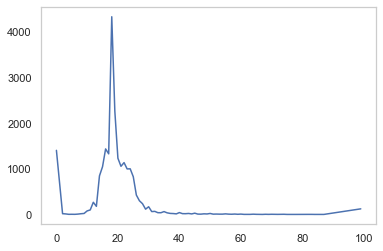

In [37]:
#education

fineetàstudio = df.groupby('d8').count().reset_index()

fineetàstudio2 = fineetàstudio[fineetàstudio['d8'] != 'dk']
fineetàstudio2 = fineetàstudio2[fineetàstudio2['d8'] != 'Refusal']

plt.plot(fineetàstudio2.d8, fineetàstudio2.qb2)

#gli 0 sono quelli che stanno ancora studiando, i 99 missing


In [38]:
fineetàstudio

,d8,qb1a,qb2,qb5,qb4_3,qb4_5,qb7,qb8,qb9,d1,d10,d11,country,d25,d63,d7
0,0,1405,1405,1405,1405,1405,1405,1405,1405,1405,1405,1405,1405,1405,1405,1405
1,2,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17
2,3,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12
3,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
4,5,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,84,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
78,87,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
79,99,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123
80,Refusal,69,69,69,69,69,69,69,69,69,69,69,69,69,69,69


In [40]:
#df.to_csv('qb1a.csv')

In [39]:
edu = df.groupby('d8').count()
edu

,qb1a,qb2,qb5,qb4_3,qb4_5,qb7,qb8,qb9,d1,d10,d11,country,d25,d63,d7
d8,,,,,,,,,,,,,,,
0,1405,1405,1405,1405,1405,1405,1405,1405,1405,1405,1405,1405,1405,1405,1405
2,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17
3,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12
4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
5,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
87,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
99,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123


In [38]:
edu_nan= df.d8.isnull().sum().sum()
edu_nan

0

In [39]:
#df.d8 = pd.to_numeric(df.d8, errors='coerce')
def transform_education(x):
    if isinstance(x, int): 
        if x == 0:
            return 'Still studying'
        if x <= 15:
            return 'up to 15 years old'
        if (x > 15) & (x <= 19) :
            return '16-19 years old'
        if (x >= 20): 
            return '20+ years old'
        if x == 99:
            return "Refusal/dk"
        
    else: 
        return 'Refusal/dk'
df['d8'] = df['d8'].apply(lambda x: transform_education(x))

df.head()

,qb2,qb5,qb4_3,qb4_5,qb7,qb8,qb9,d1,d10,d11,country,d25,d8,d63,d7
0,4.0,No,2,2,2,2,2,centro,Man,20,BE - Belgium,Large town,Still studying,The middle class of society,single
1,5.0,No,2,2,2,2,2,centro,Man,55,BE - Belgium,Large town,Refusal/dk,The middle class of society,con patner e figli
2,6.0,No,2,2,2,1,1,centro-sx,Man,80,BE - Belgium,Large town,Refusal/dk,The lower middle class of society,single
3,6.0,Yes,2,2,2,2,2,centro,Man,40,BE - Belgium,Large town,Refusal/dk,The lower middle class of society,con patner e figli
4,5.0,Yes,3,3,2,3,2,centro,Man,55,BE - Belgium,Large town,Refusal/dk,The middle class of society,con patner e figli


In [283]:
def transform_education2(x, età):
    if x ==  'Still studying': 
        if età <= 15:
            return 'up to 15 years old'
        if (età > 15) & (età <= 19) :
            return '16-19 years old'
        if (età >= 20): 
            return '20+ years old'
    else: 
        return x
df['d8'] = df.apply(lambda x: transform_education2(x['d8'], x['d11']), axis =1)

In [40]:
classes = df.groupby('d7').count()
classes

,qb2,qb5,qb4_3,qb4_5,qb7,qb8,qb9,d1,d10,d11,country,d25,d8,d63
d7,,,,,,,,,,,,,,
Other (SPONT.),60,60,60,60,60,60,60,60,60,60,60,60,60,60
Refusal (SPONT.),32,32,32,32,32,32,32,32,32,32,32,32,32,32
con patner,7791,7791,7791,7791,7791,7791,7791,7791,7791,7791,7791,7791,7791,7791
con patner e figli,7000,7000,7000,7000,7000,7000,7000,7000,7000,7000,7000,7000,7000,7000
single,5975,5975,5975,5975,5975,5975,5975,5975,5975,5975,5975,5975,5975,5975
single con figli,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120,1120


In [41]:
def transform_status(x):
    if x ==  'Other (SPONT.)' or x == 'Refusal (SPONT.)': 
        
        return 'Refusal/Other'
    else: 
        return x
df['d7'] = df.apply(lambda x: transform_status(x['d7']), axis =1)

In [42]:
df.groupby('d63').count()

,qb2,qb5,qb4_3,qb4_5,qb7,qb8,qb9,d1,d10,d11,country,d25,d8,d7
d63,,,,,,,,,,,,,,
The working class of society,5276,5276,5276,5276,5276,5276,5276,5276,5276,5276,5276,5276,5276,5276
The lower middle class of society,3456,3456,3456,3456,3456,3456,3456,3456,3456,3456,3456,3456,3456,3456
The middle class of society,10942,10942,10942,10942,10942,10942,10942,10942,10942,10942,10942,10942,10942,10942
The upper middle class of society,1630,1630,1630,1630,1630,1630,1630,1630,1630,1630,1630,1630,1630,1630
The higher class of society,154,154,154,154,154,154,154,154,154,154,154,154,154,154
Other (SPONTANEOUS),28,28,28,28,28,28,28,28,28,28,28,28,28,28
None (SPONTANEOUS),150,150,150,150,150,150,150,150,150,150,150,150,150,150
Refusal (SPONTANEOUS),98,98,98,98,98,98,98,98,98,98,98,98,98,98
dk,244,244,244,244,244,244,244,244,244,244,244,244,244,244


In [43]:
def transform_live(x):
    if x ==  'Other (SPONTANEOUS)' or x == 'None (SPONTANEOUS)' or x == 'Refusal (SPONTANEOUS)' or x =='dk': 
        
        return 'Refusal/Other'
    else: 
        return x
df['d63'] = df.apply(lambda x: transform_live(x['d63']), axis =1)

In [44]:
c = df.groupby('country').mean().reset_index()

c['country2'] = np.nan
for i in range(len(c)): 
    c['country2'][i] =  c['country'][i][5:]
  

C:\Users\giusp\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\giusp\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [45]:
c

,country,qb2,qb4_3,qb4_5,qb7,qb8,qb9,d11,country2
0,FR - France,8.274780,1.792974,2.076537,1.504391,1.528231,1.461731,49.276035,France
1,BE - Belgium,7.523711,1.853608,1.936082,1.556701,1.636082,1.619588,50.386598,Belgium
2,NL - The Netherlands,7.441676,1.808607,1.862967,1.439411,1.532276,1.453001,58.292186,The Netherlands
3,DE-W - Germany - West,8.355037,1.754300,2.061425,1.528256,1.644963,1.474201,51.651106,- Germany - West
4,IT - Italy,8.198895,1.635359,2.188950,1.592265,1.570166,1.553591,47.359116,Italy
5,LU - Luxembourg,8.340852,1.766917,2.120301,1.461153,1.596491,1.491228,50.225564,Luxembourg
6,DK - Denmark,8.203814,1.690107,1.600715,1.293206,1.326579,1.415971,54.713945,Denmark
7,IE - Ireland,8.064655,1.550647,1.505388,1.368534,1.386853,1.419181,47.090517,Ireland
8,GB-UKM - United Kingdom,7.906103,1.672535,1.563380,1.303991,1.318075,1.360329,51.476526,M - United Kingdom
9,GR - Greece,8.656909,1.586651,1.911007,1.374707,1.393443,1.366511,48.577283,Greece


In [46]:
c['country2'][3] = 'Germany'
c['country2'][12] = 'Germany'
c['country2'][16] = 'Cyprus'
c['country2'][8] = 'United Kingdom'
c['country2'][10] = 'Spain'
c['country2'][2] = 'Netherlands'
c['country2'][17] =  'Czech Republic'

C:\Users\giusp\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\giusp\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\giusp\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

In [47]:
c = c[['country', 'country2']]

In [48]:
df = pd.merge(df, c, how='left', left_on='country', right_on='country')
df.head()

,qb2,qb5,qb4_3,qb4_5,qb7,qb8,qb9,d1,d10,d11,country,d25,d8,d63,d7,country2
0,4.0,No,2,2,2,2,2,centro,Man,20,BE - Belgium,Large town,Still studying,The middle class of society,single,Belgium
1,5.0,No,2,2,2,2,2,centro,Man,55,BE - Belgium,Large town,Refusal/dk,The middle class of society,con patner e figli,Belgium
2,6.0,No,2,2,2,1,1,centro-sx,Man,80,BE - Belgium,Large town,Refusal/dk,The lower middle class of society,single,Belgium
3,6.0,Yes,2,2,2,2,2,centro,Man,40,BE - Belgium,Large town,Refusal/dk,The lower middle class of society,con patner e figli,Belgium
4,5.0,Yes,3,3,2,3,2,centro,Man,55,BE - Belgium,Large town,Refusal/dk,The middle class of society,con patner e figli,Belgium


In [49]:
df = df.drop('country', axis = 1)
df = df.rename(columns={"country2": "country"})


In [50]:
df

,qb2,qb5,qb4_3,qb4_5,qb7,qb8,qb9,d1,d10,d11,d25,d8,d63,d7,country
0,4.0,No,2,2,2,2,2,centro,Man,20,Large town,Still studying,The middle class of society,single,Belgium
1,5.0,No,2,2,2,2,2,centro,Man,55,Large town,Refusal/dk,The middle class of society,con patner e figli,Belgium
2,6.0,No,2,2,2,1,1,centro-sx,Man,80,Large town,Refusal/dk,The lower middle class of society,single,Belgium
3,6.0,Yes,2,2,2,2,2,centro,Man,40,Large town,Refusal/dk,The lower middle class of society,con patner e figli,Belgium
4,5.0,Yes,3,3,2,3,2,centro,Man,55,Large town,Refusal/dk,The middle class of society,con patner e figli,Belgium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21973,10.0,No,2,2,2,2,2,non-posizionabile,Woman,40,Small or middle sized town,16-19 years old,The middle class of society,con patner e figli,Croatia
21974,10.0,No,2,2,2,1,2,non-posizionabile,Woman,46,Rural area or village,16-19 years old,The middle class of society,con patner,Croatia
21975,10.0,No,2,1,2,2,1,centro,Woman,40,Rural area or village,16-19 years old,The middle class of society,single,Croatia
21976,10.0,No,2,1,1,1,1,non-posizionabile,Woman,36,Rural area or village,20+ years old,The middle class of society,con patner,Croatia


In [57]:
df.to_csv('df-prova10.csv')

In [295]:
len(df)

21978

In [54]:
df1 = pd.read_csv('df-def.csv')
df1 = df1.drop('Unnamed: 0', axis = 1)



len(df1)

21978

In [55]:
df1

,qb2,qb5,qb4_3,qb4_5,qb7,qb8,qb9,d1,d10,d11,d25,d8,d63,d7,country,cca,cluster,dip2x2,dip3x2
0,4.0,0,2,2,2,2,2,centro,Man,20,Large town,20+ years old,The middle class of society,single,Belgium,1,2,non fa niente e non si preoccupa,non fa niente e si preoccupa abbastanza
1,5.0,0,2,2,2,2,2,centro,Man,55,Large town,Refusal/dk,The middle class of society,con patner e figli,Belgium,1,2,non fa niente e non si preoccupa,non fa niente e si preoccupa abbastanza
2,6.0,0,2,2,2,1,1,centro-sx,Man,80,Large town,Refusal/dk,The lower middle class of society,single,Belgium,2,1,non fa niente e si preoccupa,non fa niente e si preoccupa abbastanza
3,6.0,1,2,2,2,2,2,centro,Man,40,Large town,Refusal/dk,The lower middle class of society,con patner e figli,Belgium,1,2,fa qualcosa e si preoccupa,fa qualcosa e si preoccupa abbastanza
4,5.0,1,3,3,2,3,2,centro,Man,55,Large town,Refusal/dk,The middle class of society,con patner e figli,Belgium,2,4,fa qualcosa e non si preoccupa,fa qualcosa e si preoccupa abbastanza
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21973,10.0,0,2,2,2,2,2,non-posizionabile,Woman,40,Small or middle sized town,16-19 years old,The middle class of society,con patner e figli,Croatia,1,2,non fa niente e si preoccupa,non fa niente e si preoccupa molto
21974,10.0,0,2,2,2,1,2,non-posizionabile,Woman,46,Rural area or village,16-19 years old,The middle class of society,con patner,Croatia,2,2,non fa niente e si preoccupa,non fa niente e si preoccupa molto
21975,10.0,0,2,1,2,2,1,centro,Woman,40,Rural area or village,16-19 years old,The middle class of society,single,Croatia,3,5,non fa niente e si preoccupa,non fa niente e si preoccupa molto
21976,10.0,0,2,1,1,1,1,non-posizionabile,Woman,36,Rural area or village,20+ years old,The middle class of society,con patner,Croatia,5,3,non fa niente e si preoccupa,non fa niente e si preoccupa molto


In [56]:
df['cca'] = df1['cca']
df['clusetr'] = df1['cluster']
df['dip2x2'] = df1['dip2x2']
df['dip3x2'] = df1['dip3x2']
